<a href="https://colab.research.google.com/github/PosgradoMNA/Actividades_de_Aprendizaje_A01793670_BryanAlvaradoCruz/blob/main/A01793670_Actividad_Semanal_7_Regresiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad Semanal 7
##Ciencia y analítica de datos
###Profesor: Dra. María de la Paz Rico Fernández
####Estudiantes: Bryan Alvarado Cruz A01793670
#####Fecha: 9 de Noviembre del 2022

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [1]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
#Librerías de regresion lineal
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,  make_scorer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, train_test_split, RepeatedKFold, cross_validate

In [3]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [4]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

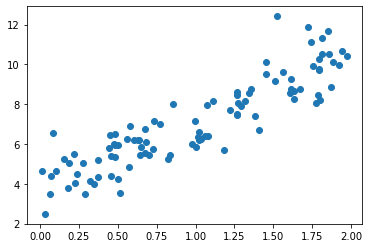

In [5]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [6]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [7]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [8]:
#X_fit[]

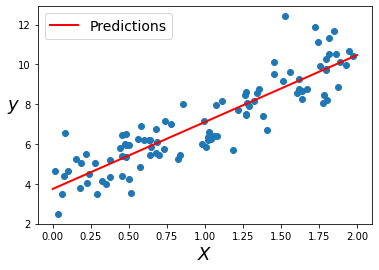

In [9]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [10]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [11]:
X_new.shape

(2, 1)

In [12]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [13]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [14]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [15]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

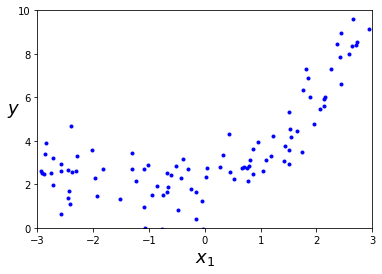

In [16]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [17]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [19]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [20]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [21]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [22]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

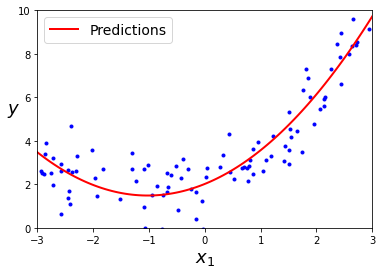

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [24]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [25]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [26]:
len(X)

1000

In [27]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

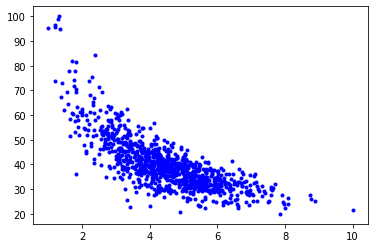

In [28]:
plt.plot(X,y,'b.')

In [29]:
#lineal
#lineal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)
lista_para_mae =[] 
lista_para_r2 =[] 

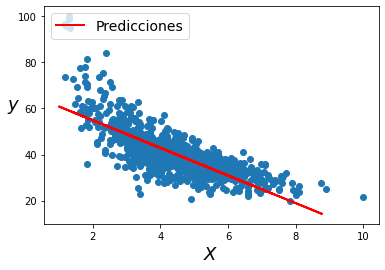

In [32]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
X_para_regresion = X_test  
y_para_regresion = linear_reg.predict(X_para_regresion)
plt.scatter(X_train, y_train)
plt.plot(X_para_regresion, y_para_regresion, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [33]:
#la ecuacion
linear_reg.coef_, linear_reg.intercept_

#$\hat{y} = -5.98X + 66.83
#La descripcion de la ecuaci[on]
print('El modelo es: Y =', linear_reg.coef_,'X +', linear_reg.intercept_)

mae_regresion_lineal_simple = metrics.mean_absolute_error(y_test,y_para_regresion)
lista_para_mae.append(mae_regresion_lineal_simple) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_regresion_lineal_simple = r2_score(y_test,y_para_regresion)
lista_para_r2.append(r2_regresion_lineal_simple)

# los errores
print('Error Medio Absoluto (MAE):', metrics.mean_absolute_error(y_test,y_para_regresion))
print('Error Medio Cuadrado (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_para_regresion)))

#la r cuadrada
print('r2_score:', r2_score(y_test,y_para_regresion))

El modelo es: Y = [-5.98882699] X + 66.83650741226988
Error Medio Absoluto (MAE): 5.013587781954963
Error Medio Cuadrado (RMSE): 7.108963321847682
r2_score: 0.6116251549562579


In [34]:
#polinomial
caracteristicas_para_poly = PolynomialFeatures(degree=2, include_bias=False) 

X_polinomial = caracteristicas_para_poly.fit_transform(X_train)
print("Input",caracteristicas_para_poly.n_input_features_)
print("Ouput",caracteristicas_para_poly.n_output_features_)
print("Powersn",caracteristicas_para_poly.powers_)

regresion_lineal_poli = LinearRegression(fit_intercept=True) 
regresion_lineal_poli.fit(X_polinomial, y_train)
regresion_lineal_poli.coef_, regresion_lineal_poli.intercept_

Input 1
Ouput 2
Powersn [[1]
 [2]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The attribute `n_input_features_` was deprecated in version 1.0 and will be removed in 1.2.
  warnings.warn(msg, category=FutureWarning)


(array([-16.40638102,   1.13136095]), 88.80179909112496)

In [35]:
X_polinomial.shape

(900, 2)

In [36]:
X_polinomial_test = caracteristicas_para_poly.fit_transform(X_test)
X_polinomial_test.shape

(100, 2)

In [37]:
y_con_regresion_poli = regresion_lineal_poli.predict(X_polinomial_test)
y_con_regresion_poli.shape

(100,)

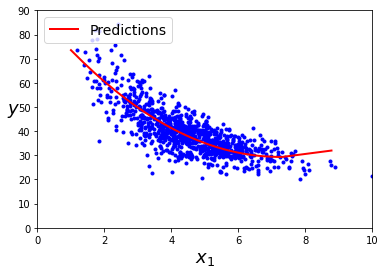

In [38]:
order = np.argsort(X_test.values.ravel()) 

sortedXPoly = X_test.values.ravel()[order] 
sortedYPoly = y_test.values.ravel()[order]
sorted_predicPoly = y_con_regresion_poli[order]

#plt.plot(X_test, y_test, "b.") #Estamos ploteando sobre datos de prueba, pero tambien podemos sobre los de entrenamiento
plt.plot(X, y, "b.")  #Aqui es para que veamos mas a detalle la linea de regresion, todo es cuestion de perspectiva
plt.plot(sortedXPoly, sorted_predicPoly, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 90]);

In [41]:
#Los errores
from sklearn import metrics
from sklearn.metrics import r2_score


print('El modelo es: Y =', regresion_lineal_poli.coef_[1],'X^2 +', regresion_lineal_poli.coef_[0],'X +',regresion_lineal_poli.intercept_)

mae_regresion_lineal_multiple = metrics.mean_absolute_error(y_test,y_con_regresion_poli)
lista_para_mae.append(mae_regresion_lineal_multiple) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_regresion_lineal_multiple = r2_score(y_test,y_con_regresion_poli)
lista_para_r2.append(r2_regresion_lineal_multiple)

metrica_mae = metrics.mean_absolute_error(y_test, y_con_regresion_poli)

r2Score = r2_score(y_test, y_con_regresion_poli)

print('Error medio Absoluto (MAE):', metrica_mae)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_con_regresion_poli)))
print('r2_score',r2Score)

El modelo es: Y = 1.1313609537119216 X^2 + -16.406381017212386 X + 88.80179909112496
Error medio Absoluto (MAE): 4.3833025759681075
Root Mean Squared Error: 5.832771301068425
r2_score 0.7385501224942536


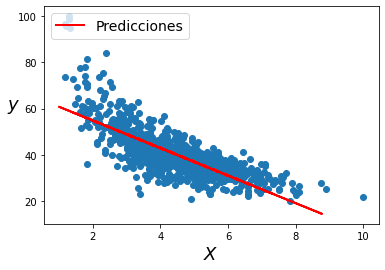

In [42]:
#Ridge
mi_ridge = Ridge(alpha=5.0,fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
mi_ridge.fit(X_train, y_train)
X_para_ridge = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_para_ridge = mi_ridge.predict(X_para_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_para_ridge, y_para_ridge, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [43]:
#metricas del ridge

mae_ridge = metrics.mean_absolute_error(y_test,y_para_ridge)
lista_para_mae.append(mae_ridge) 
r2_ridge= r2_score(y_test,y_para_ridge)
lista_para_r2.append(r2_ridge)

metrica_mae_ridge = metrics.mean_absolute_error(y_test, y_para_ridge)
r2Score = r2_score(y_test, y_para_ridge)
print('Error medio Absoluto (MAE):', metrica_mae_ridge)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_para_ridge)))
print('r2_score',r2Score)

#La ecuacion

print('El modelo es: Y =', mi_ridge.coef_,'X +', mi_ridge.intercept_)

Error medio Absoluto (MAE): 5.016205738992834
Root Mean Squared Error: 7.111111949820097
r2_score 0.6113903530239646
El modelo es: Y = [-5.97003397] X + 66.75243237759665


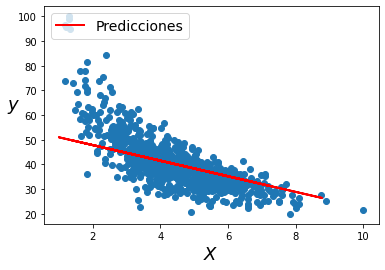

In [44]:
#Lasso
mi_lasso = Lasso(alpha=5.0,fit_intercept=True) # el 5  es recomendacion de los que ya probaron, pero le pueden poner lo que sea para hacer prueba
mi_lasso.fit(X_train, y_train)
X_para_lasso = X_test  #Aqui recordemos que se hace con los de prueba, no con los de entrenamiento
y_para_lasso = mi_lasso.predict(X_para_ridge)
plt.scatter(X_train, y_train)
plt.plot(X_para_lasso, y_para_lasso, "r-", linewidth=2, label="Predicciones")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [45]:
#Las metricas del lasso

mae_lasso = metrics.mean_absolute_error(y_test,y_para_lasso)
lista_para_mae.append(mae_lasso) #Ojo con los corchetes y los parentesis, en el ppend debe de ser con parentesis, pero en la deficnion es con corchetes para no hacer tuplas, 
r2_lasso= r2_score(y_test,y_para_lasso)
lista_para_r2.append(r2_lasso)


metrica_mae_lasso = metrics.mean_absolute_error(y_test, y_para_lasso)
r2Score = r2_score(y_test, y_para_lasso)
print('Error medio Absoluto (MAE):', metrica_mae_lasso)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_para_lasso)))
print('r2_score',r2Score)

#La ecuacion

print('El modelo es: Y =', mi_lasso.coef_,'X +', mi_lasso.intercept_)

Error medio Absoluto (MAE): 5.681207654677401
Root Mean Squared Error: 8.409660991642687
r2_score 0.456505036516648
El modelo es: Y = [-3.15572458] X + 54.16195119377412


In [46]:
print(lista_para_mae)
print(lista_para_r2)

[5.013587781954963, 4.3833025759681075, 4.3833025759681075, 5.016205738992834, 5.681207654677401]
[0.6116251549562579, 0.7385501224942536, 0.7385501224942536, 0.6113903530239646, 0.456505036516648]


ValueError: ignored

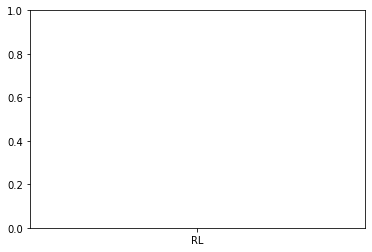

In [48]:
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Ridge')
nombres.append('Lasso')

plt.bar(nombres, lista_para_mae)
plt.title('MAE')
plt.show()

In [40]:
from sklearn import metrics
from sklearn.metrics import r2_score



print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, y_pred)))
print('r2_score',r2_score(y, y_pred))

El modelo es: Y = 1.1313609537119216 X^2 + -16.406381017212386 X + 88.80179909112496


NameError: ignored

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [ ]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

#Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.

*    Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).
*    Regresión Lineal.
*        Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.
*    Regresión Polinomial.
        Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.
    Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.
    Finalmente grafica :
        MAE (de los cuatro métodos)
        R2 (de los cuatro métodos)
*    Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?


In [ ]:
#tu codigo aquí